In [669]:
## Importing the necessary packages and setting up the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import os
import matplotlib as mpl
import sklearn
import seaborn as sns
import tensorflow as tf
import scipy
from tensorflow import keras
import xgboost

mpl.rcParams["axes.grid"] = False
%matplotlib inline

In [3]:
dataset_path = Path(os.getcwd()) / "production_data" / "volve_production_data_working.xlsx"

In [4]:
## Installing openpyxl library to read the excel file in pandas
# pip install openpyxl

In [5]:
prod_df = pd.read_excel(dataset_path, parse_dates = [0])

In [6]:
prod_df.head()

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,7405,0.0,0.00000,0.00000,0.00000,0.0,0.000000,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
1,2014-04-08,7405,0.0,NaN,NaN,NaN,0.0,1.003059,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
2,2014-04-09,7405,0.0,NaN,NaN,NaN,0.0,0.979008,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
3,2014-04-10,7405,0.0,NaN,NaN,NaN,0.0,0.545759,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
4,2014-04-11,7405,0.0,310.37614,96.87589,277.27826,0.0,1.215987,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production


In [7]:
prod_df.describe()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,9161.000000,9161.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.000000,9155.000000,9161.000000,9161.000000,9161.000000,15.0
mean,6034.808645,20.168721,181.803869,77.162969,154.028787,14.856100,55.168533,45.377811,67.728440,19.170492,1095.631548,161049.059703,1672.151332,0.0
std,824.532027,8.293401,109.712363,45.657948,76.752373,8.406822,36.692924,24.752631,27.719028,22.580005,1323.538151,188136.410434,1706.982853,0.0
min,5351.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,0.0
25%,5351.000000,24.000000,0.000000,0.000000,83.665361,10.841437,18.952989,31.148062,56.577834,3.356379,190.690000,29430.590000,19.870000,0.0
50%,5599.000000,24.000000,232.896939,103.186689,175.588861,16.308598,52.096877,37.933620,80.071250,9.566033,557.550000,87749.660000,1097.790000,0.0
75%,7078.000000,24.000000,255.401455,106.276591,204.319964,21.306125,99.924288,57.101268,88.062202,26.967948,1345.200000,202482.300000,3260.950000,0.0
max,7405.000000,25.000000,397.588550,108.502178,345.906770,30.019828,100.000000,137.311030,93.509584,125.718570,5901.840000,851131.520000,8019.740000,0.0


In [8]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161 entries, 0 to 9160
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   9161 non-null   datetime64[ns]
 1   NPD_WELL_BORE_CODE        9161 non-null   int64         
 2   ON_STREAM_HRS             9161 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 5   AVG_DP_TUBING             8980 non-null   float64       
 6   AVG_ANNULUS_PRESS         7890 non-null   float64       
 7   AVG_CHOKE_SIZE_P          8919 non-null   float64       
 8   AVG_CHOKE_UOM             9161 non-null   object        
 9   AVG_WHP_P                 9155 non-null   float64       
 10  AVG_WHT_P                 9146 non-null   float64       
 11  DP_CHOKE_SIZE             9155 non-null   float64       
 12  BORE_OIL_VOL        

In [9]:
prod_df.drop(["AVG_CHOKE_UOM", "FLOW_KIND", "AVG_DP_TUBING", "BORE_WI_VOL", "AVG_ANNULUS_PRESS"], axis = 1, inplace = True)

In [10]:
## Function to break the dataset into separate datasets so that each dataset only contains a single well data
## Returns a dictionary with key as well id and values as the corresponding dataset for that well

def wellwise_break(df):
    wells = df.NPD_WELL_BORE_CODE.unique()
    df_wells = {}
    for well in wells:
        df_wells[well] = df[df["NPD_WELL_BORE_CODE"] == well].reset_index(drop = True)
        df_wells[well] = df_wells[well].drop(["NPD_WELL_BORE_CODE"], axis = 1)
    return df_wells

In [11]:
well_df_dict = wellwise_break(prod_df)

In [12]:
list(well_df_dict.keys())

[7405, 7078, 5599, 5769, 7289, 5351]

In [13]:
# A utility function to save the figures in the "figures" folder inside the working directory

def fig_save(fig, name, path = 'C:\\Users\\spect\\OneDrive\\Desktop\\ML_conda_projects\\spectre_lab\\volve_dataset_project\\figures'):
    fig.savefig(os.path.join(path, name + ".png"), dpi = 1000, bbox_inches = "tight")
    print(os.path.join(path, name + ".png"))

C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7405.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7078.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5599.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5769.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7289.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5351.png


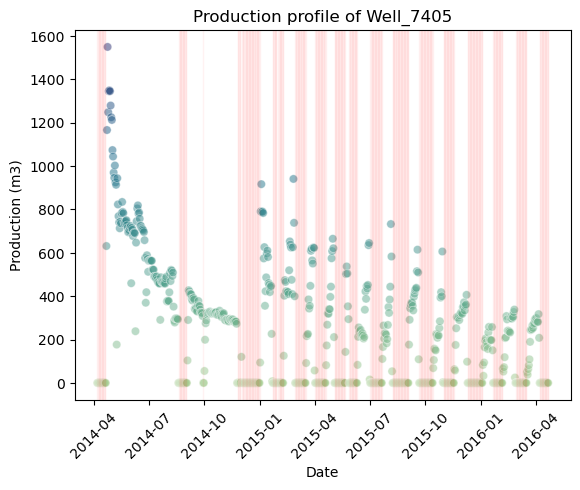

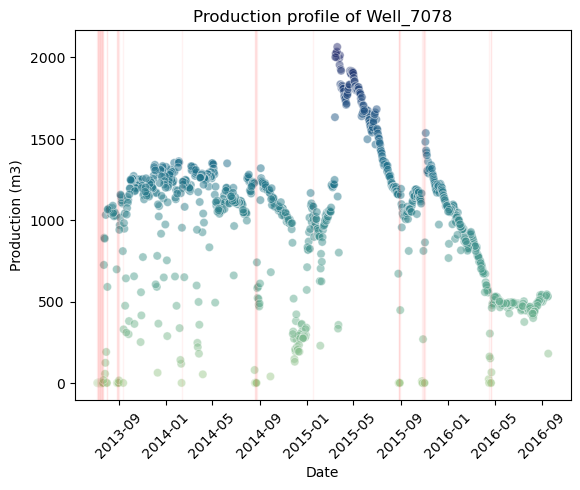

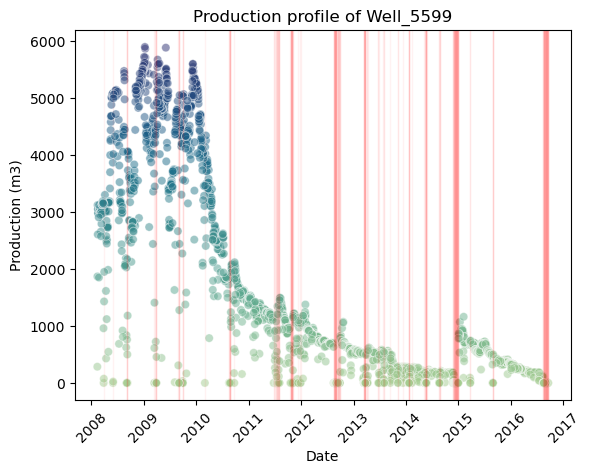

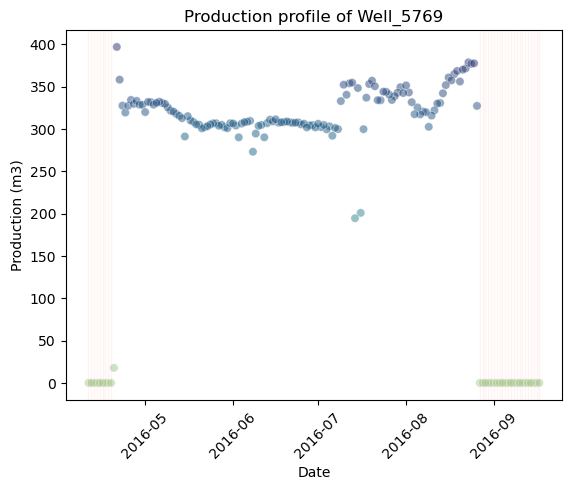

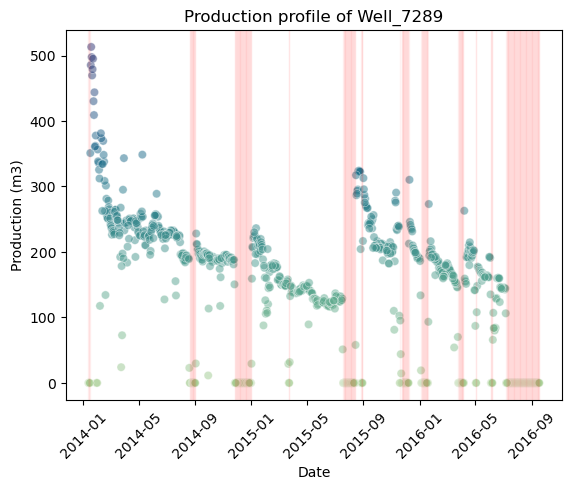

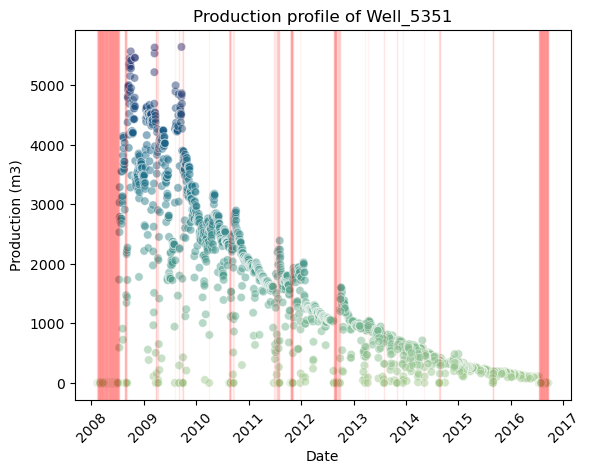

In [14]:
# Visualizing the production profile of all the wells...

for (well, df) in zip(well_df_dict.keys(), well_df_dict.values()):
    df_nf_dates = df[df.ON_STREAM_HRS == 0]["DATEPRD"]
    fig, ax_1 = plt.subplots()
    ax_1 = sns.scatterplot(x = df.DATEPRD, y = df.BORE_OIL_VOL, hue = df.BORE_OIL_VOL, 
                           palette = "crest", alpha = 0.5, legend = False)
    plt.xticks(rotation = 45)
    for date in df_nf_dates:
        ax_1.axvline(date, color = "r" , linewidth = 1, alpha = 0.05)
    ax_1.set(title = f"Production profile of Well_{well}", xlabel = "Date", ylabel = "Production (m3)")
    fig_save(fig, f"Production profile of Well_{well}")

After cisualizing the production profiles for all the wells, we choose the well 5351 for building our model as it has:
1. large number of sample points taken over a long period of time, and
2. its production follows the typical declining production trend seen in a typical oil well

In [15]:
df_5351 = well_df_dict[5351].copy()

# Cleaning the Dataset

In [16]:
df_5351.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   ON_STREAM_HRS             3056 non-null   float64       
 2   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 4   AVG_CHOKE_SIZE_P          2860 non-null   float64       
 5   AVG_WHP_P                 3056 non-null   float64       
 6   AVG_WHT_P                 3056 non-null   float64       
 7   DP_CHOKE_SIZE             3056 non-null   float64       
 8   BORE_OIL_VOL              3056 non-null   float64       
 9   BORE_GAS_VOL              3056 non-null   float64       
 10  BORE_WAT_VOL              3056 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 262.8 KB


AVG_CHOKE_SIZE_P feature has 196 nan values. We'll drop the instances with no choke size values.

AVG_DOWNHOLE_PRESSURE and AVG_DOWNHOLE_TEMPERATURE both have 6 nan values within common instances. This is probably due to some sensor error as the production is non-zero in these instances. We'll also drop these instances.

In [17]:
## Removing Dates on which the well flowed for zero hours from the dataset
df_5351.drop(index = list(df_5351[df_5351.ON_STREAM_HRS == 0].index), axis = 0, inplace = True)

## Removing Dates on which the well produced zero m3 oil from the dataset
df_5351.drop(index = list(df_5351[df_5351.BORE_OIL_VOL == 0].index), axis = 0, inplace = True)

## Removing Instances with null values in CHOKE Size and Downhole Pressure/Temp
df_5351.drop(index = list(df_5351[pd.isna(df_5351.AVG_CHOKE_SIZE_P)].index), axis = 0, inplace = True)
df_5351.drop(index = list(df_5351[pd.isna(df_5351.AVG_DOWNHOLE_PRESSURE)].index), axis = 0, inplace = True)

df_5351.reset_index(drop = True, inplace = True)

In [18]:
df_5351.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   2717 non-null   datetime64[ns]
 1   ON_STREAM_HRS             2717 non-null   float64       
 2   AVG_DOWNHOLE_PRESSURE     2717 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  2717 non-null   float64       
 4   AVG_CHOKE_SIZE_P          2717 non-null   float64       
 5   AVG_WHP_P                 2717 non-null   float64       
 6   AVG_WHT_P                 2717 non-null   float64       
 7   DP_CHOKE_SIZE             2717 non-null   float64       
 8   BORE_OIL_VOL              2717 non-null   float64       
 9   BORE_GAS_VOL              2717 non-null   float64       
 10  BORE_WAT_VOL              2717 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 233.6 KB


In [19]:
df_5351.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,23.050687,246.505180,101.647452,72.917002,43.807395,85.825170,13.757965,1443.872091,211714.204891,2620.978601
std,3.438220,25.077625,8.742068,27.658527,18.125673,5.836733,16.542586,1288.453491,181932.248688,1282.606590
min,0.625000,0.000000,0.000000,2.485842,0.000000,12.134665,1.450701,4.300000,856.020000,-59.190000
25%,24.000000,240.602292,99.873083,44.923847,31.499809,85.357485,2.616243,330.840000,50906.870000,2126.160000
50%,24.000000,247.191777,101.782098,76.692234,34.951201,87.383659,5.696694,1040.770000,164156.910000,3101.530000
75%,24.000000,261.519886,105.141984,100.000000,49.828866,88.717042,17.151500,2235.480000,327273.000000,3492.760000
max,25.000000,289.897009,106.772733,100.000000,115.184383,93.509584,82.983969,5644.370000,789974.730000,5691.770000


In [20]:
## Some data points have ON_STREAM_HRS > 24...setting them to 24

for index in df_5351[df_5351.ON_STREAM_HRS > 24].index:
    df_5351.loc[index, "ON_STREAM_HRS"] = 24

In [21]:
## Since the Well head Pressure can't be zero for non-zero oil production, we are replacing it with the median value
df_5351.loc[df_5351[df_5351.AVG_WHP_P <= 1].index, "AVG_WHP_P"] = df_5351.AVG_WHP_P.median()

## Similarly, since the Downhole Pressure and Temperature can't be zero for non-zero oil production, 
## we are replacing it with the median value
df_5351.loc[df_5351[df_5351.AVG_DOWNHOLE_PRESSURE == 0].index, "AVG_DOWNHOLE_PRESSURE"] = df_5351.AVG_DOWNHOLE_PRESSURE.median()
df_5351.loc[df_5351[df_5351.AVG_DOWNHOLE_TEMPERATURE == 0].index, "AVG_DOWNHOLE_TEMPERATURE"] = df_5351.AVG_DOWNHOLE_TEMPERATURE.median()

In [22]:
df_5351.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,23.049285,247.869875,102.209370,72.917002,43.845806,85.825170,13.757965,1443.872091,211714.204891,2620.978601
std,3.437653,17.071416,4.364058,27.658527,18.069896,5.836733,16.542586,1288.453491,181932.248688,1282.606590
min,0.625000,49.450440,20.959721,2.485842,27.185420,12.134665,1.450701,4.300000,856.020000,-59.190000
25%,24.000000,240.886223,99.887850,44.923847,31.508247,85.357485,2.616243,330.840000,50906.870000,2126.160000
50%,24.000000,247.191777,101.782098,76.692234,34.951201,87.383659,5.696694,1040.770000,164156.910000,3101.530000
75%,24.000000,261.519886,105.141984,100.000000,49.828866,88.717042,17.151500,2235.480000,327273.000000,3492.760000
max,24.000000,289.897009,106.772733,100.000000,115.184383,93.509584,82.983969,5644.370000,789974.730000,5691.770000


In [23]:
## Sorting the values in ascending order wrt the date column

df_5351 = df_5351.sort_values(["DATEPRD"])
df_5351.reset_index(inplace = True, drop = True)

In [24]:
## Saving the cleaned 5351 well production data to excel file
working_df_path = dataset_path.parent / "working_df_v3.xlsx"
df_5351.to_excel(str(working_df_path), index = False)  ##index = False doesn't save the index

In [416]:
df = pd.read_excel(working_df_path)

We will use the average flow rate feature AVG_OIL_FLOW_RATE instead of BORE_OIL_VOL as the target variable as it is a more appropriate metric.

In [417]:
## Adding the feature for cummulative oil produced by shifting the cumulative sum of oil produced by 1 row downwards
## Not adding cummulative water and cummulative gas produced because they are highly correlated to Cummulative Oil Produced

# df["CUMM_OIL"] = np.r_[0, np.cumsum(df.loc[:,["BORE_OIL_VOL"]]).values.ravel()[1:]]

In [418]:
## Adding a field called AVG_OIL_FLOW_RATE

df["AVG_OIL_FLOW_RATE"] = df.BORE_OIL_VOL/df.ON_STREAM_HRS

In [419]:
df.head()

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,AVG_OIL_FLOW_RATE
0,2008-07-13,24.00,260.866875,103.292880,21.052993,100.714919,52.381899,69.539413,1735.26,252235.23,4.00,72.302500
1,2008-07-14,5.57,256.248230,104.017718,27.223459,99.598318,71.115352,68.016167,592.36,88949.00,1.37,106.348294
2,2008-07-15,24.00,254.982785,103.967009,27.277954,98.649941,67.590753,66.948884,2532.21,373786.28,5.84,105.508750
3,2008-07-16,24.00,251.475921,104.210557,30.650552,95.658734,73.782251,63.663812,3030.71,447840.09,9.13,126.279583
4,2008-07-17,24.00,249.346191,104.339184,32.562537,93.585252,78.035440,61.337700,3288.08,474614.43,7.58,137.003333


In [420]:
## Defining a function to plot the Date vs Flow rate chart
def date_vs_prod(df, nf_plot = False):
    fig, ax_1 = plt.subplots()
    sns.scatterplot(data = df, x = "DATEPRD", y = "AVG_OIL_FLOW_RATE", hue = "AVG_OIL_FLOW_RATE", alpha = 0.5, size = 5, ax = ax_1,
                   legend = False, palette="crest")
    if nf_plot:
        nf_dates = df[df.ON_STREAM_HRS == 0]
        nf_dates = nf_dates.iloc[:,0].values
        for date in nf_dates:
            ax_1.axvline(date, color = "r" , linewidth = 1, alpha = 0.05)
    return fig

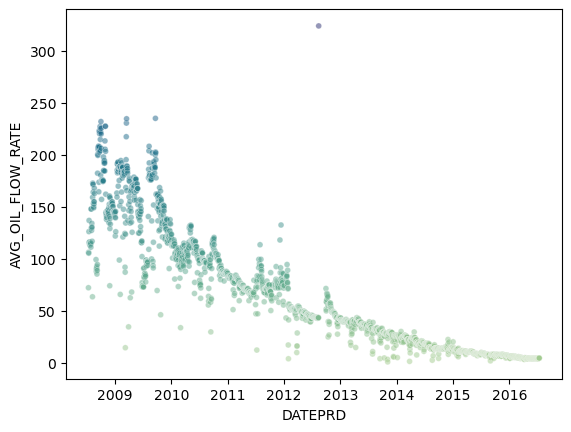

In [421]:
## Testing the above function
plot = date_vs_prod(df)

Now our data looks ready for EDA :)

## EDA

In [422]:
# #Training dataset is taken to be all the data points before after April 2013 and before June 2015.
# # Validation and testing dataset is taken to be all the data points after June 2015

# df_5351_train = df_5351[(df_5351.DATEPRD >= pd.to_datetime("04/01/2013")) & (df_5351.DATEPRD < pd.to_datetime("06/01/2015"))]
# df_5351_val_test = df_5351[df_5351.DATEPRD >= pd.to_datetime("06/01/2015")]

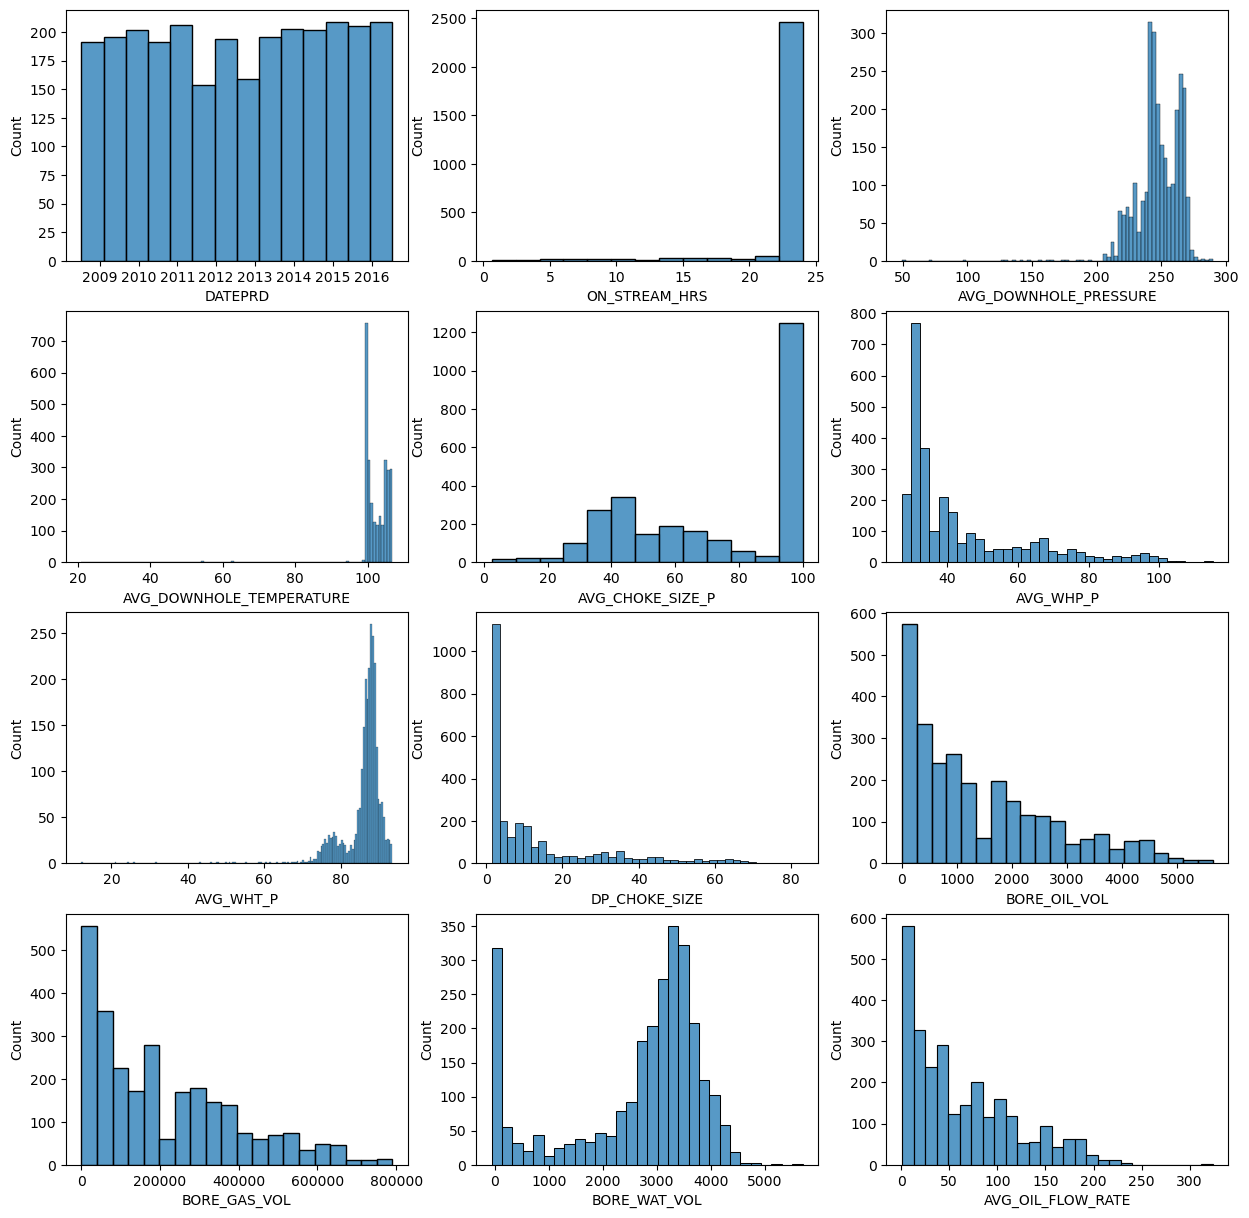

In [423]:
## Visualizing the ditribution of the features in the dataset

cols = list(df.columns)
nrows = len(cols)/3 if len(cols)%3 == 0 else len(cols)//3+1
fig, ax = plt.subplots(nrows = int(nrows), ncols = 3, figsize = (15,15))
for index, (col, axis) in enumerate(zip(cols, ax.ravel())):
    sns.histplot(data=df, x = col, ax = axis)

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\2013007748.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_corr.corr()


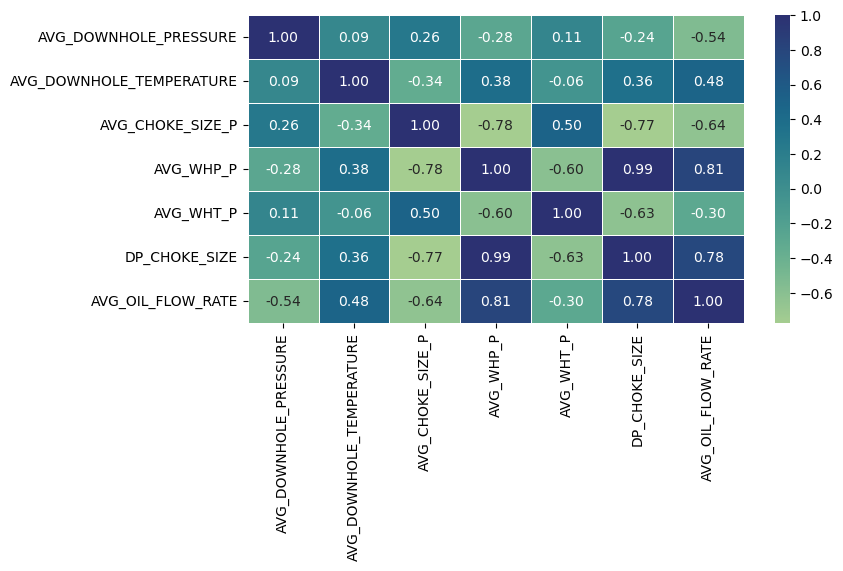

In [424]:
df_corr = df.drop(columns = ["ON_STREAM_HRS", "BORE_GAS_VOL", "BORE_WAT_VOL", "BORE_OIL_VOL"], axis = 1)
corr_matrix = df_corr.corr()
fig = plt.figure(figsize = (8,4))
ax = sns.heatmap(corr_matrix, annot = True, cmap = "crest", linewidth = 0.5, 
            annot_kws = {"fontsize": 10}, fmt=".2f")

The above boxplot shows that Wellhead Pressure is highly positively correlated to Oil Production, which is to be expected.

Also, Wellhead Pressure is highly positively correlated with Downhole Temperatue. WHy?

Also, Wellhead Pressure is very highly positively correlated to DP Choke Size, which is also to be expected. 

Also, DP Choke Size is negatively correlated to AVG Choke SIZE P which is also expected.

---

One interesting observation is that Well Head Temperature is not correlated with Downhole Temperature. Reasons for this are as follows:

The wellhead temperature of an oil well will be somewhat less than the BHT. The amount of cooling as crude flows to the surface will depend on several factors:

1. The relative amounts of oil and water
2. The specific heats of oil and water
3. The flow rate, the gas/liquid ratio
4. The vertical-flow pressure drop that controls the gas liberated and the attendant cooling effect, and the thermal heat transfer rate from the wellbore.

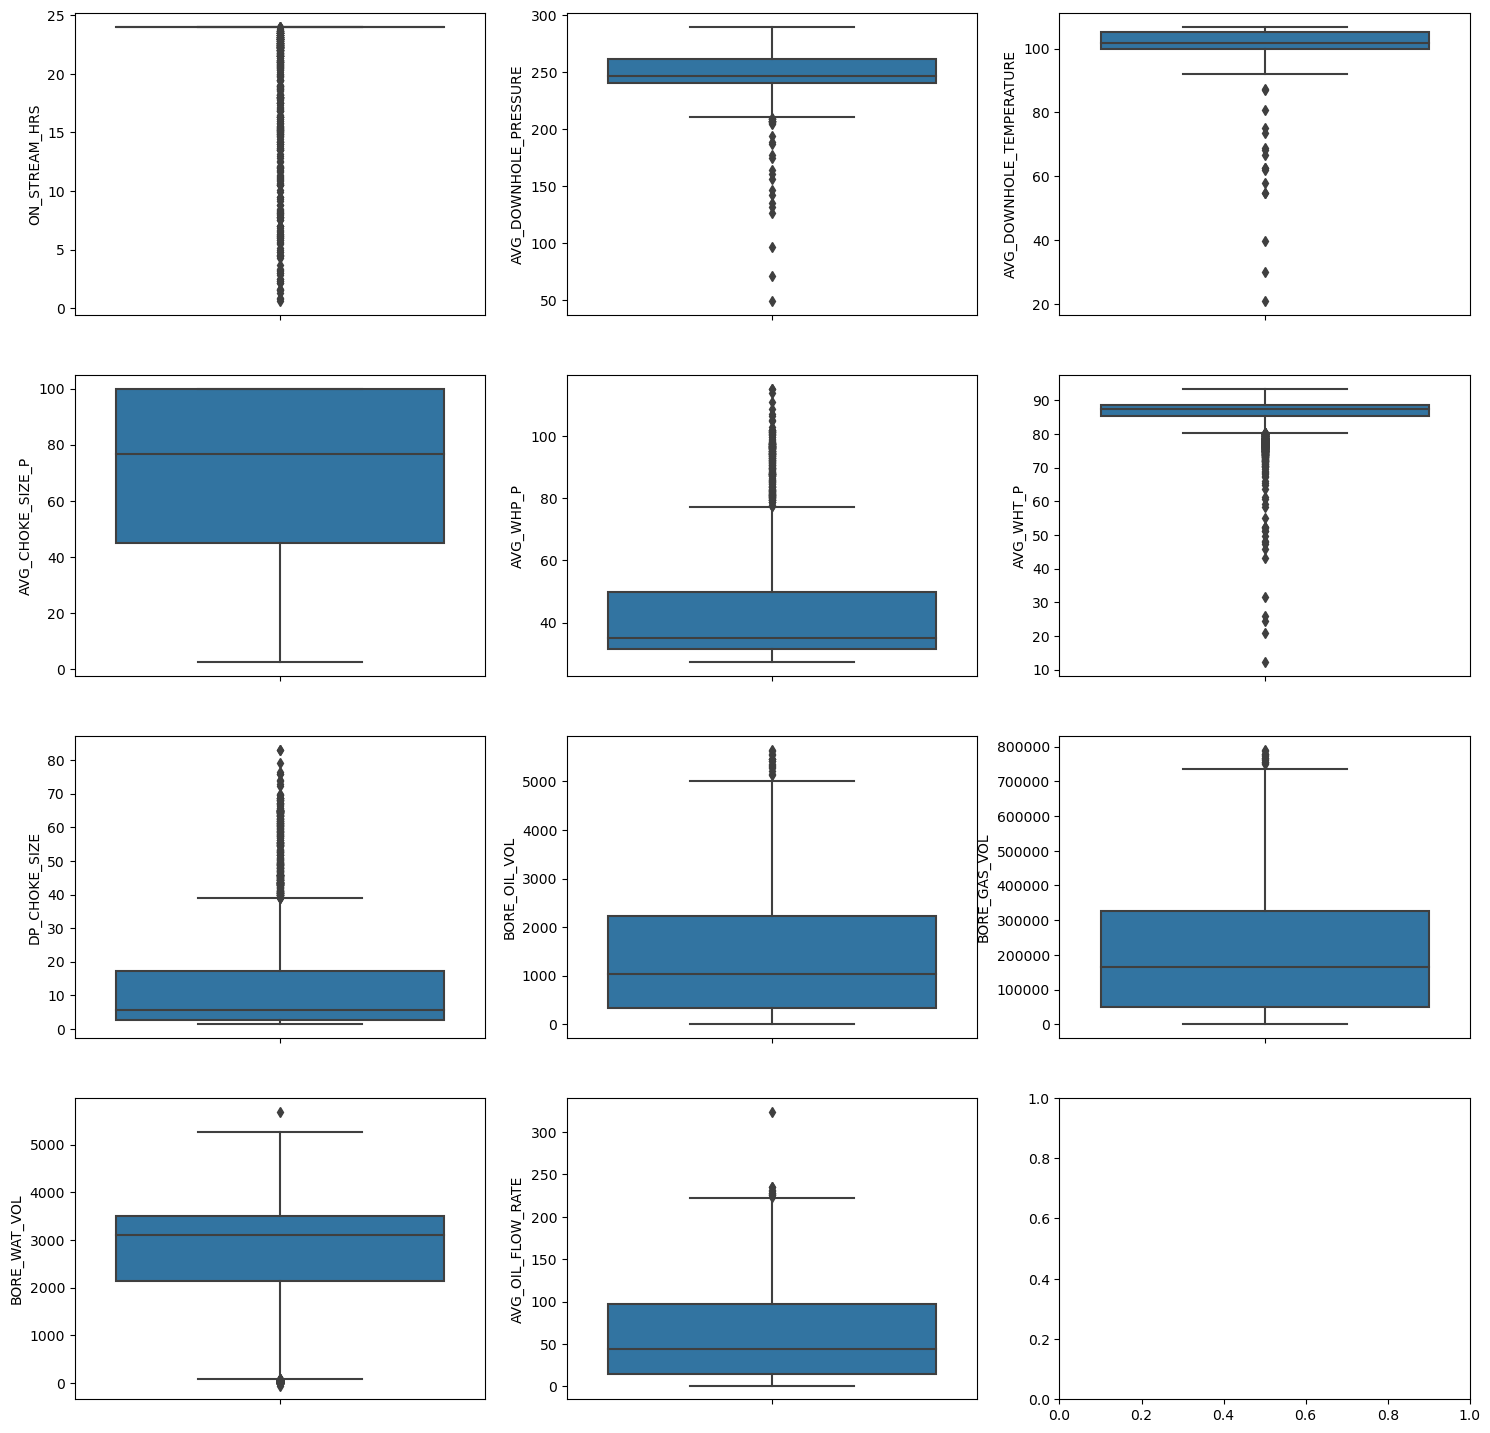

In [425]:
## Visualizing the ditribution of the features in the dataset

cols = list(df.columns[1:])
nrows = len(cols)/3 if len(cols)%3 == 0 else len(cols)//3+1
fig, ax = plt.subplots(nrows = int(nrows), ncols = 3, figsize = (18,18))
for index, (col, axis) in enumerate(zip(cols, ax.ravel())):
    sns.boxplot(data=df, y = col, ax = axis)

***

There is one clear outlier in AVG_OIL_FLOW_RATE...analysing that:

In [426]:
df[df.AVG_OIL_FLOW_RATE > 300]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,AVG_OIL_FLOW_RATE
1365,2012-08-13,0.625,252.892348,101.88657,7.777673,46.152546,83.714672,17.2037,202.53,3754.12,-59.19,324.048


Since the above point is clearly an outlier, we will remove that point

In [427]:
df.drop(index = list(df[df.AVG_OIL_FLOW_RATE > 300].index), axis = 0, inplace = True)

***

Why are there so many values with low downhole temperatures? Is the well head temperature also low at those points? Do these points occur during the winters?

In [428]:
## Analysing the abnormally low values of downhole temperature (values less than 90 deg)

df_temp = df[(df.AVG_DOWNHOLE_TEMPERATURE < 100) & (df.AVG_DOWNHOLE_PRESSURE < 220)]
df_temp

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,AVG_OIL_FLOW_RATE
243,2009-04-04,24.00000,142.195394,62.097413,36.915852,82.265890,79.017304,49.444290,4266.19,603057.78,39.67,177.757917
246,2009-04-09,15.58334,156.704604,68.810278,32.956922,82.462544,71.992248,50.463594,2094.72,291446.14,2.62,134.420477
252,2009-04-16,17.52500,126.438256,57.945863,33.940204,76.983197,70.601237,44.686935,2452.26,337254.14,1.42,139.929244
256,2009-04-20,24.00000,161.168309,75.026294,38.396193,72.358102,78.249001,39.642990,3990.32,539753.59,2.50,166.263333
276,2009-05-11,24.00000,131.509383,62.529313,41.256309,67.970132,80.122545,34.854465,4241.75,575312.38,18.76,176.739583
311,2009-06-15,13.60833,204.891693,96.998262,33.790855,69.501117,72.837203,37.502203,1724.89,248079.85,12.74,126.752511
521,2010-01-20,24.00000,194.357709,87.218937,49.241114,52.011679,86.076854,19.134864,2789.61,389180.91,2595.68,116.233750
542,2010-02-10,24.00000,188.629729,80.615963,41.727705,60.036823,89.643162,27.782542,2521.73,355402.62,2616.02,105.072083
555,2010-02-23,23.08333,71.154596,30.076100,37.115075,63.935236,88.950753,31.642675,2144.80,307980.27,2126.16,92.915537
557,2010-02-25,18.50000,49.450440,20.959721,40.528096,60.117145,87.488834,28.340810,1709.58,243034.51,1755.05,92.409730


From the above table, it is observed that the low values of downhole temperature coexists with low values of downhole pressure. This indicates erroneous values being produced by the downhole equipment measuring the downhole pressure and temperature. Therefore, we are going to replace these values with median values.

In [429]:
## Replacing the outliers in Downhole Pressure and Downhole Temperature with their medians

temp_median = df["AVG_DOWNHOLE_TEMPERATURE"].median()
press_median = df["AVG_DOWNHOLE_PRESSURE"].median()
df["AVG_DOWNHOLE_TEMPERATURE"] = df.AVG_DOWNHOLE_TEMPERATURE.apply(lambda temp: temp_median if temp < 100 else temp)
df["AVG_DOWNHOLE_PRESSURE"] = df.AVG_DOWNHOLE_PRESSURE.apply(lambda press: press_median if press < 220 else press)

***

Doing seasonality analysis on the oil volume produced using FFT

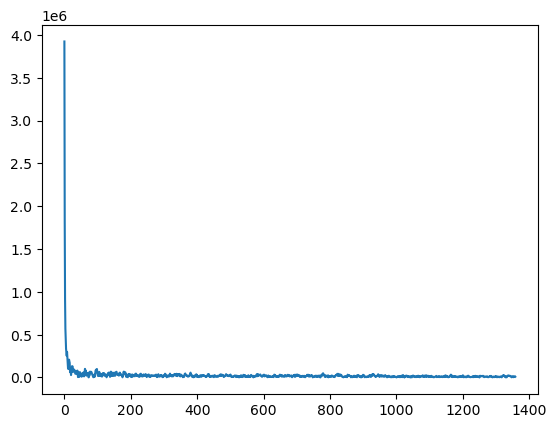

In [430]:
freq = tf.signal.rfft(df.BORE_OIL_VOL)
plt.plot(np.abs(freq)[:10000])

The above graph shows that there is no seasonal trend in the oil production volume

***

Analysing the correlation between wellhead pressure and oil flow rate

<AxesSubplot: xlabel='AVG_WHP_P', ylabel='AVG_OIL_FLOW_RATE'>

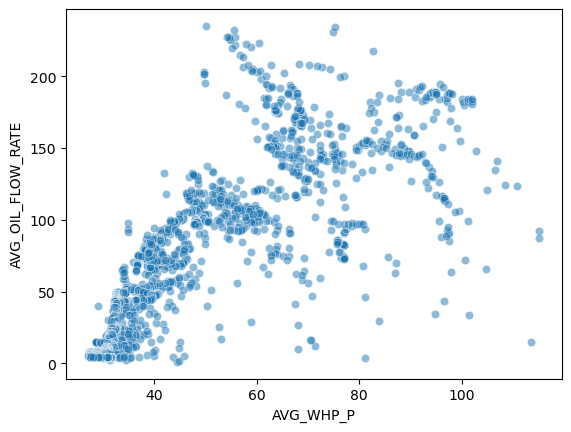

In [431]:
sns.scatterplot(x = df.AVG_WHP_P, y = df.AVG_OIL_FLOW_RATE, alpha = 0.5)

Analysing Wellhead Pressure vs Oil Flow Rate on yearwise basis for more in-depth analysis

In [432]:
df_temp = df.copy()
df_temp["Year"] = df_temp.DATEPRD.apply(lambda x: x.year)

In [433]:
years = np.unique(df_temp.Year)
years

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

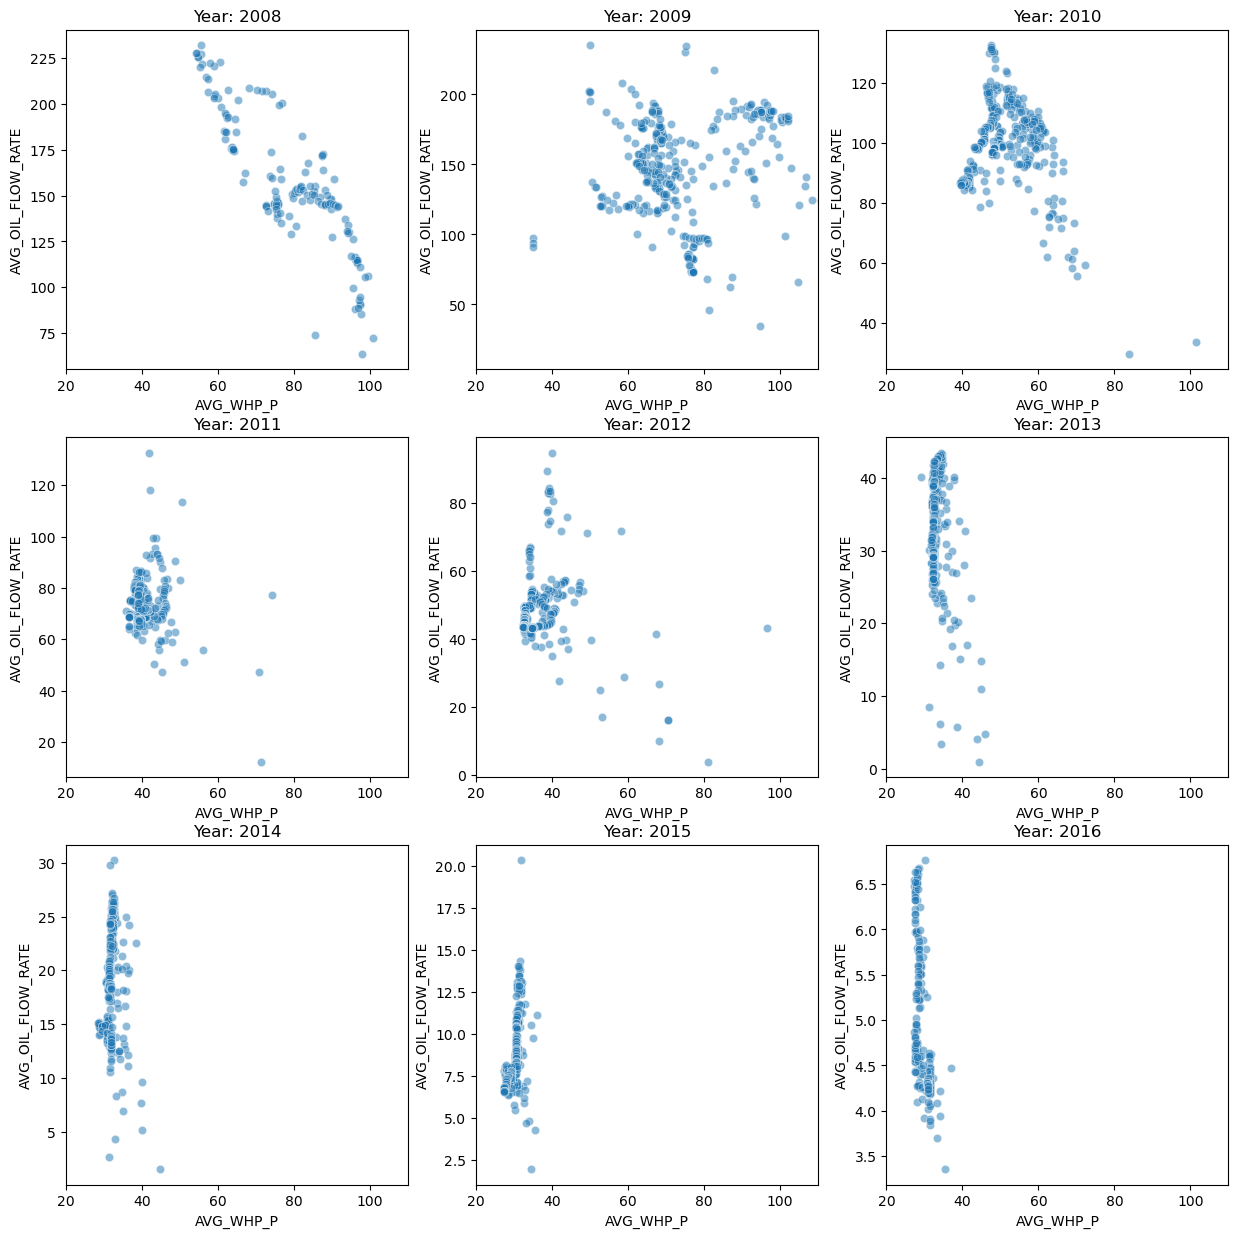

In [434]:
fig, ax = plt.subplots(nrows = 3, ncols= 3, figsize = (15,15))
for (year, axis) in zip(years, ax.ravel()):
    df_year = df_temp[df_temp.Year == year]
    sns.scatterplot(data = df_year, x = "AVG_WHP_P", y = "AVG_OIL_FLOW_RATE", alpha = 0.5, ax=axis, )
    axis.set(title = f"Year: {year}", xlim = [20, 110])

From the above plots, we can see that the high wellhead pressure datapoints (>80) mostly lie in the year 2008-09 plots, when the well was young, and producing high volumes of oil. As the time has progressed, the oil volume has also decreased alongwith the wellhead pressure. 

In [435]:
# ## Implementing the above observations and removing the outliers in Wellhead Pressure values

# df["Year"] = df.DATEPRD.apply(lambda x: x.year)
# df = df[(df.Year <= 2009) | 
#         ((df.Year == 2010) & (df.AVG_WHP_P < 80)) |
#         ((df.Year > 2010) & (df.AVG_WHP_P < 60))]

# df.drop(columns = ["Year"], inplace = True, axis = 1) ## Dropping the Year column again as its no longer needed

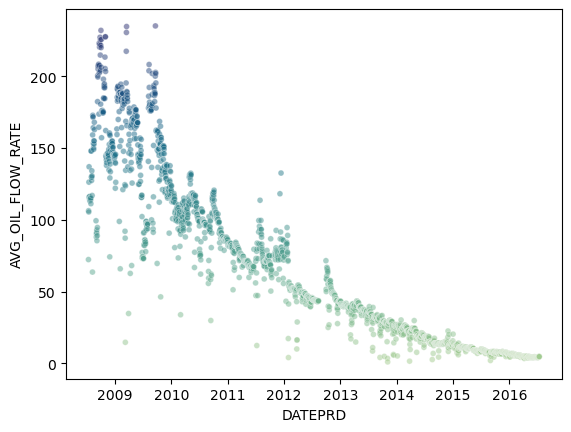

In [436]:
date_vs_prod(df)
plt.show()

***

# Modelling

### Preparing a function to apply all the pre-processing steps in a single go

In [437]:
def preprocessor(df_, train_start_date, val_date, test_date, DATEPROD = True, 
                 Day_col = False, Month_col = False, Year_col = False, scale = True):
    
    """
    Function for performing all the preprocessing steps in one go
    """
    
    # Creating a copy of the passed dataset so that the original dataset is not modified
    df = df_.copy()
    
    ## Removing Dates on which the well flowed for zero hours from the dataset
    df.drop(index = list(df[df.ON_STREAM_HRS == 0].index), axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    ## Dropping the date points where the oil volume produced is equal to zero
    df.drop(index = list(df[df.BORE_OIL_VOL == 0].index), axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    ## Some data points have ON_STREAM_HRS > 24...setting them to 24
    for index in df[df.ON_STREAM_HRS > 24].index:
        df.loc[index, "ON_STREAM_HRS"] = 24
    
    # Breaking the DATEPRD column into Day, Month and Year columns
    if Day_col:
        df["Day"] = df.DATEPRD.dt.day
    if Month_col:
        df["Month"] = df.DATEPRD.dt.month
    if Year_col:
        df["Year"] = df.DATEPRD.dt.year

    ## Removing features which are not needed
    features_x = ["ON_STREAM_HRS", 'BORE_GAS_VOL', 'BORE_WAT_VOL', "BORE_OIL_VOL"]
    df = df.drop(columns = features_x, axis = 1)
    
    ## Plotting graphs for visualizing the points taken into consideration while building the training, validation and 
    ## test datasets
    date_vs_prod(df)
    plt.axvline(pd.to_datetime(train_start_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(val_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(test_date), linestyle = "dotted", color = "orange")
    plt.title("ALL DATA POINTS")
    date_vs_prod(df[df.DATEPRD >= pd.to_datetime(train_start_date)])
    plt.axvline(pd.to_datetime(train_start_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(val_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(test_date), linestyle = "dotted", color = "orange")
    plt.title("DATA POINTS CONSIDERED")
    
    # Training dataset is taken to be all the data points after train_start_date and before val_date
    # Validation and testing dataset is taken to be all the data points after val_date
    df_train = df[(df.DATEPRD >= pd.to_datetime(train_start_date)) & (df.DATEPRD < pd.to_datetime(val_date))].copy()
    df_val_test = df[df.DATEPRD >= pd.to_datetime(val_date)].copy()
    
    ##_______ TO BE DONE AFTER SEPERATING TRAIN DATASET _________
    
#     ## Replacing the zero/na values in downhole pressure and temperature with the mean values
#     dhp_mean = df_train["AVG_DOWNHOLE_PRESSURE"].mean()
#     dht_mean = df_train["AVG_DOWNHOLE_TEMPERATURE"].mean()

#     for df_ in [df_train, df_val_test]:
#         dhp_index = df_[(df_.AVG_DOWNHOLE_PRESSURE.isna()) | (df_.AVG_DOWNHOLE_PRESSURE == 0)].index
#         dht_index = df_[(df_.AVG_DOWNHOLE_TEMPERATURE.isna()) | (df_.AVG_DOWNHOLE_PRESSURE == 0)].index

#         for index in dhp_index:
#             df_.loc[index, "AVG_DOWNHOLE_PRESSURE"] = dhp_mean

#         for index in dht_index:
#             df_.loc[index, "AVG_DOWNHOLE_TEMPERATURE"] = dht_mean
    
#     ## Removing outliers from the features in the training datset
#     df_train = df_train[
#         (df_train.AVG_DOWNHOLE_PRESSURE > 200) &
#         (df_train.AVG_DOWNHOLE_TEMPERATURE > 90) &
#         (df_train.AVG_WHP_P != 0) &
#         (df_train.AVG_WHP_P < 80) &
#         (df_train.AVG_WHT_P > 70) &
#         (df_train.DP_CHOKE_SIZE < 70)
#     ]
    
    # Creating X_train, y_train, X_val, y_val, X_test, y_test
    # Validation data is taken to be data points from val_date till test_date
    # Test data is taken to be data points from test_date till the last available date
    features_list = list(df_train.columns)
    features_list.remove("AVG_OIL_FLOW_RATE")

    y_train = df_train["AVG_OIL_FLOW_RATE"]
    X_train = df_train.loc[:,features_list]

    df_val = df_val_test[df_val_test.DATEPRD < pd.to_datetime(test_date)]
    df_test = df_val_test[df_val_test.DATEPRD >= pd.to_datetime(test_date)]

    y_val = df_val["AVG_OIL_FLOW_RATE"]
    X_val = df_val.loc[:,features_list]

    y_test = df_test["AVG_OIL_FLOW_RATE"]
    X_test = df_test.loc[:,features_list]
    
    # Dropping DATEPROD col
    if DATEPROD:
        for df_ in [X_train, X_val, X_test]:
            df_.drop(["DATEPRD"], axis = 1, inplace = True)
    features_ = list(X_train.columns)
    print(f" Features in the output datasets: {features_}")
    
    # Scaling the data using StandardScaler from sklearn
    if scale:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
    
    # Printing the length of X_train, X_val and X_test datasets
    print(f"Total data points taken for training/validation/testing: {len(X_train) + len(X_val) + len(X_test)}")
    for X_name, X_df in zip(["Train", "Validation", "Test"], [X_train, X_val, X_test]):
        print(f"Data points in {X_name} are: {len(X_df)}")
    
    return (features_, X_train, y_train, X_val, y_val, X_test, y_test)

In [438]:
## Function for plotting predicted values vs actual values

def predict_plot(actual, predicted, fig_title = ""):
    """
    predict_plot(actual_values, predicted_values)
    """
    import matplotlib as mpl
    cmap = mpl.cm.get_cmap("cividis")
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.scatter(actual, predicted, alpha = 0.2 , c = cmap((np.abs(actual)-np.abs(predicted))/np.abs(actual)))
    ax.set_xlabel("Actual values")
    ax.set_ylabel("Predicted values")
    ax.plot(np.linspace(actual.min(), actual.max(), 100), np.linspace(actual.min(), actual.max(), 100), "r--")
    ax.set_title(fig_title)
    sm = mpl.cm.ScalarMappable(cmap = cmap)
    cbar = plt.colorbar(sm)
    cbar.set_label('Error in predictions scaled to [0,1]', rotation=270)
    cbar.ax.set_yticklabels(['0','','','',"",'1'])
    plt.show()

### Preparing the data and trying non-time series models (linear, SVM, ensembles, NN)

In [439]:
df.DATEPRD

0      2008-07-13
1      2008-07-14
2      2008-07-15
3      2008-07-16
4      2008-07-17
          ...    
2712   2016-07-09
2713   2016-07-10
2714   2016-07-11
2715   2016-07-12
2716   2016-07-13
Name: DATEPRD, Length: 2716, dtype: datetime64[ns]

 Features in the output datasets: ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']
Total data points taken for training/validation/testing: 1261
Data points in Train are: 705
Data points in Validation are: 269
Data points in Test are: 287


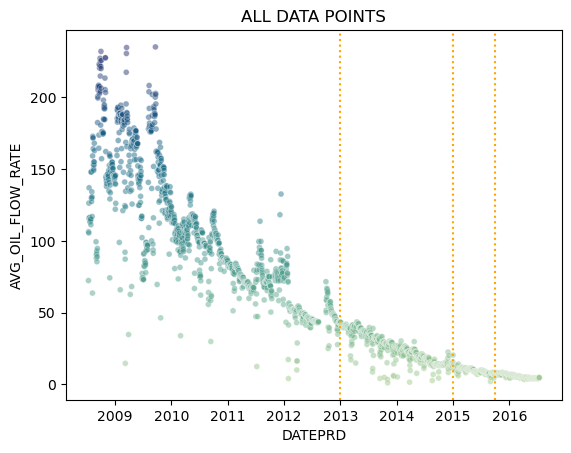

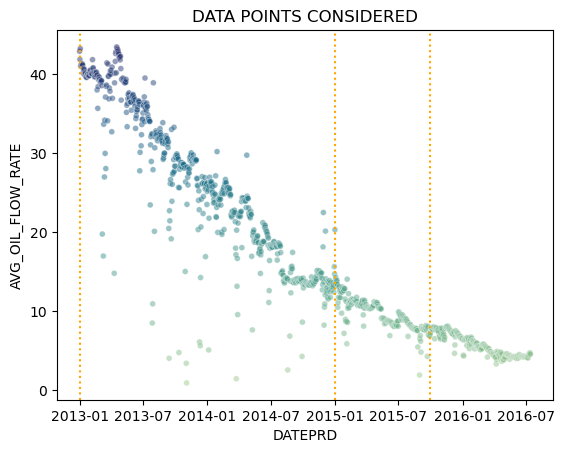

In [440]:
(features, X_train, y_train, X_val, y_val, X_test, y_test) = preprocessor(df, train_start_date="01/01/2013",
                                                             val_date = "01/01/2015", test_date = "10/01/2015",
                                                               Day_col = False, Month_col = False, Year_col = False)

***

## Implementing Decline Curve Analysis (DCA)

In [441]:
from scipy.optimize import curve_fit   #Importing the curve fit function from scipy package

def hyperbolic_equation(t, qi, b, di):
    """
    Hyperbolic decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        b: Float. Hyperbolic decline constant
        di: Float. Nominal decline rate at time t=0
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi/((1.0+b*di*t)**(1.0/b))

def exponential_equation(t, qi, di):
    """
    Exponential decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        di: Float. Nominal decline rate (constant)
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi*np.exp(-di*t)

def dca_plotter(flow_rates):
    """
    Plots DCA curves hyperbolica and exponential. Returns the constants of hyperbolic curve equation [qi_h, b, di_h]
    
    """

    def get_max_initial_production(flow_rates, number_days):
        return flow_rates[:number_days].max()
    
    def hyp_exp_plot(flow_rates, hyp_curve_fit, exp_curve_fit):
        """
        exp_curve_fit = [qi, di]
        hyp_curve_fit = [qi, b, di]
        """
        [qi_e, di_e] = exp_curve_fit
        [qi_h, b, di_h] = hyp_curve_fit
        
        fig = plt.figure(figsize = (10, 5))
        
        x = np.arange(len(flow_rates))
        fig = sns.scatterplot(x = x, y = flow_rates, label = "Flow Rate", color = "red", alpha = 0.8)
        fig = plt.plot(x, hyperbolic_equation(x, qi_h, b, di_h), label = f"Hyperbolic with b={b:.2E}",
                       color = "blue", linestyle = "dashed")
        fig = plt.plot(x, exponential_equation(x, qi_e, di_e), label = "Exponential", linestyle = "dashed", color = "k")
        plt.legend()
        return fig
    
    ## Getting the qi value
    qi = get_max_initial_production(flow_rates, 120)

    exp_values, exp_std = curve_fit(exponential_equation, np.arange(len(flow_rates)), flow_rates, bounds = (0, [qi, 100]))
    hyp_values, hyp_std = curve_fit(hyperbolic_equation, np.arange(len(flow_rates)), flow_rates, bounds = (0, [qi, 1, 100]))
    
    print(f"For exponential curve: qi = {exp_values[0]}, di = {exp_values[1]}")
    print(f"For hyperbolic curve: qi = {hyp_values[0]}, b = {hyp_values[1]}, di = {hyp_values[2]}")
    
    hyp_exp_plot(flow_rates, hyp_values, exp_values)
    
    return hyp_values

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\3574825352.py:37: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return flow_rates[:number_days].max()


For exponential curve: qi = 42.920034519950654, di = 50.0
For hyperbolic curve: qi = 43.46833332873359, b = 6.275600555918789e-09, di = 0.0016763162063637136


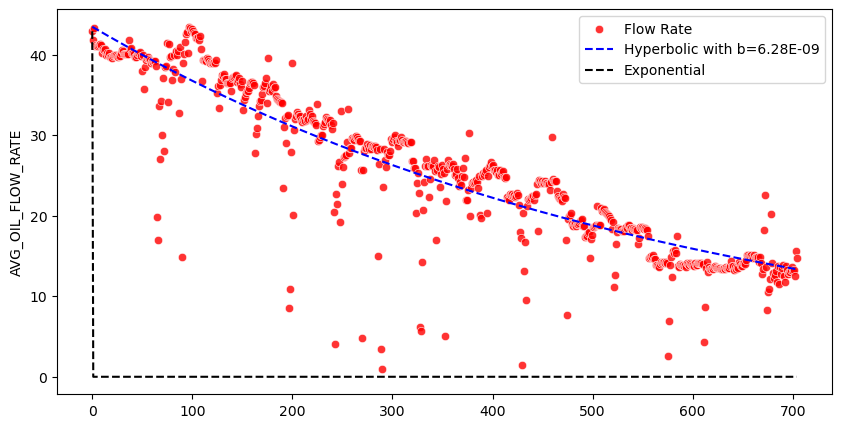

In [442]:
hyp_values = dca_plotter(y_train)

MSE for DCA Hyperbolic curve on training data: 17.03
MSE for DCA Hyperbolic curve on validation data: 2.34


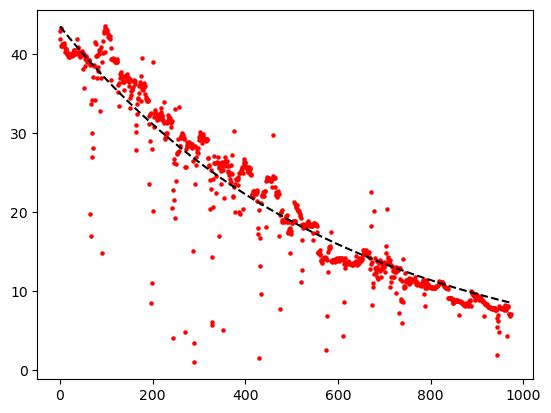

In [443]:
## Testing the hyperbolic equation obtained on training + validation data

from sklearn.metrics import mean_squared_error

Y = np.r_[y_train, y_val]
x = np.arange(len(Y))

[qi, b, di] = hyp_values

hyp = hyperbolic_equation(x, qi, b, di)
plt.scatter(x = x, y = Y, s = 5, color = "red")
plt.plot(x, hyp, linestyle = "dashed", color = "k")

## Calculating the MSE if we only use DCA for flowrate prediction

hyp_train_pred = hyp[:len(y_train)]
hyp_val_pred = hyp[len(y_train):]

hyp_train_mse = mean_squared_error(y_train, hyp_train_pred)
hyp_val_mse = mean_squared_error(y_val, hyp_val_pred)

print(f"MSE for DCA Hyperbolic curve on training data: {hyp_train_mse:.2f}")
print(f"MSE for DCA Hyperbolic curve on validation data: {hyp_val_mse:.2f}")

The Hyperbolic equation obtained from decline curve analysis fits the data points on the training and validation data very well

Thus, the hyperbolic equation can be used to check the performance of our models

### Including the flow rates as predicted by DCA in the training, validation, and test data

The DCA will only be fitted on the training data for model selection and training+validation data for test data performance evaluation

Here, we will fit the DCA only on the training data and then use the hyperbolic equation obtained to get predicted flow rates

In [444]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

[qi, b, di] = hyp_values  ##hyp_values is obtained by fitting the curve using dca_plotter() function

X_ = np.r_[X_train, X_val, X_test]
hyp_q = hyperbolic_equation(np.arange(len(X_)), qi, b, di)
hyp_q_scaled = scaler.fit_transform(hyp_q.reshape(-1, 1))
X_ = np.c_[X_, hyp_q_scaled]

X_train_dca = X_[:len(X_train), :]
X_val_dca = X_[len(X_train):(len(X_val)+len(X_train)), :]
X_test_dca = X_[(len(X_train) + len(X_val)):, :]

## Modifying the features list to include the DCA column feature name
if features.count("DCA_FLOW_RATE") == 0:
    features = features + ["DCA_FLOW_RATE"]

In [445]:
X_train_dca.shape, X_val_dca.shape, X_test_dca.shape

((705, 7), (269, 7), (287, 7))

In [446]:
features

['AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'DCA_FLOW_RATE']

***

Performing a final correlation analysis on the training and validation data

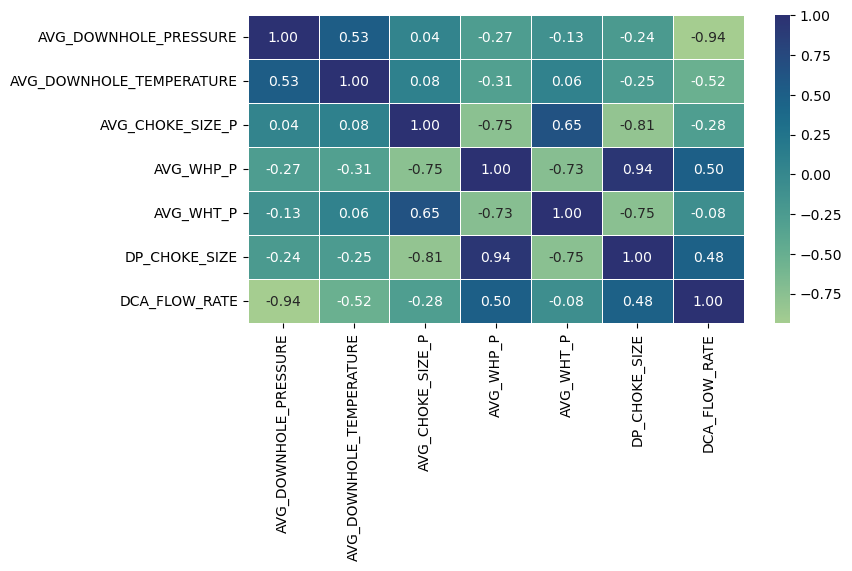

In [447]:
X_ = np.r_[X_train_dca, X_val_dca]
df_ = pd.DataFrame(X_, columns=features)
df_corr = df_.corr()
fig = plt.figure(figsize = (8,4))
ax = sns.heatmap(df_corr, annot = True, cmap = "crest", linewidth = 0.5, 
            annot_kws = {"fontsize": 10}, fmt=".2f")

***

### Creating a function to remove some specified features from a dataset

In [448]:
def feature_subsetter(features_list, features_sub, X_train, X_val, X_test):
    """
    `features_list` is a list containing the names of all the features. The order of the features in this list should 
        necessarily be the same to the order of the feautres in the dataset.
    `features_sub` is a list containing the names of the features to be kept. All other features will be removed.
    
    Return X_train, X_val, X_test
    """
    if len(features_list) != X_train.shape[1]:
        print(f"Error...no. of features in features list is {len(features_list)} and its not matching with the no. of columns in X_train {X_train.shape[1]}")
        
    features_sub_index = [features_list.index(f) for f in features_sub]

    ## Subsetting the original arrays
    X_train = X_train[:, features_sub_index]
    X_val = X_val[:, features_sub_index]
    X_test = X_test[:, features_sub_index]
    return X_train, X_val, X_test

In [449]:
features_sub = [ 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DCA_FLOW_RATE', "AVG_DOWNHOLE_TEMPERATURE"]
X_train_dca, X_val_dca, X_test_dca = feature_subsetter(features,  features_sub, X_train_dca, X_val_dca, X_test_dca)

In [450]:
X_train_dca.shape, X_val_dca.shape, X_test_dca.shape

((705, 5), (269, 5), (287, 5))

In [451]:
features = features_sub

***

## 1. Trying Linear Models

### SGD Regressor with no regularization

In [666]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = None)
sgd_reg.fit(X_train_dca, y_train)

SGDRegressor(penalty=None)

In [667]:
mean_squared_error(y_val, sgd_reg.predict(X_val_dca))

1.076566459807721

In [668]:
mean_squared_error(y_train, sgd_reg.predict(X_train_dca))

8.385161437986458

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


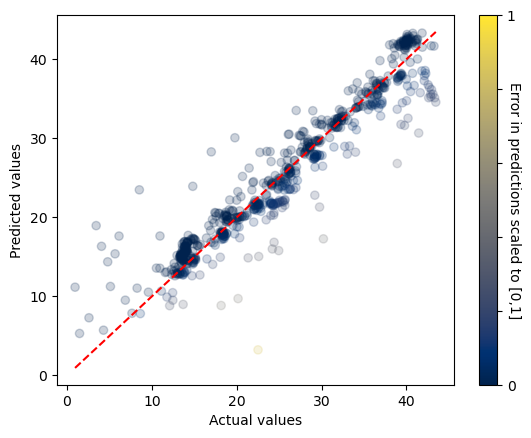

In [517]:
predict_plot(y_train, sgd_reg.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


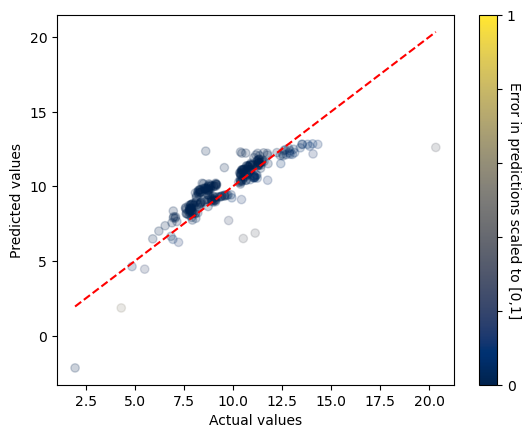

In [518]:
predict_plot(y_val, sgd_reg.predict(X_val_dca))

<AxesSubplot: >

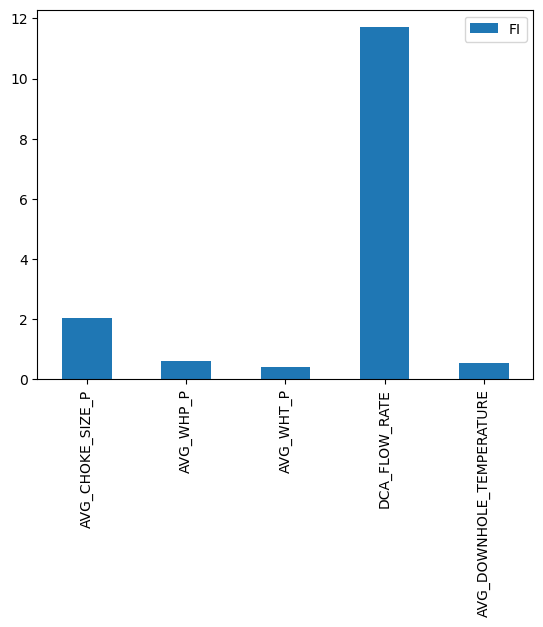

In [521]:
fi_df = pd.DataFrame(data = np.abs(sgd_reg.coef_), index = features, columns = ["FI"])
fi_df.plot.bar()

### SGD Regressor with l1 regularization

In [664]:
from sklearn.linear_model import SGDRegressor
sgd_reg_l1 = SGDRegressor(penalty = "l1", alpha = 0.001)
sgd_reg_l1.fit(X_train_dca, y_train)

SGDRegressor(alpha=0.001, penalty='l1')

In [744]:
mean_squared_error(y_val, sgd_reg_l1.predict(X_val_dca))

8.352916413330478

In [655]:
mean_squared_error(y_train, sgd_reg_l1.predict(X_train_dca))

8.39477413103597

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


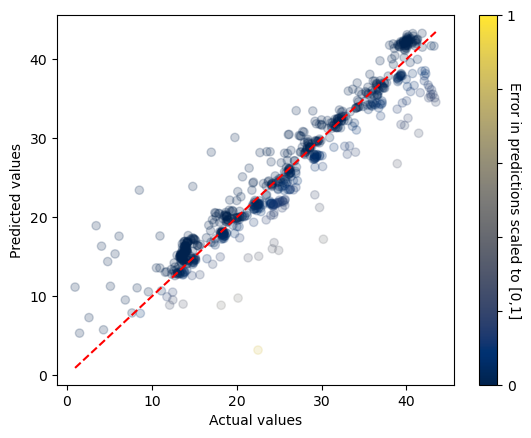

In [548]:
predict_plot(y_train, sgd_reg_l1.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


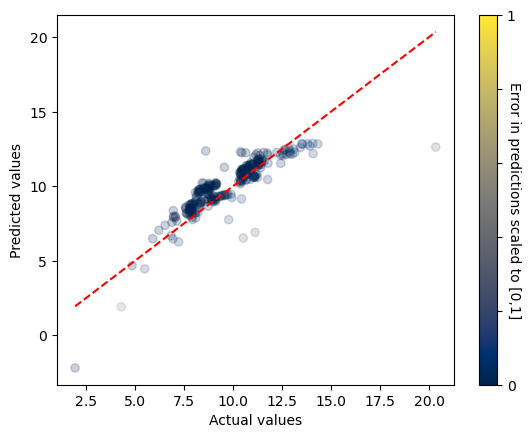

In [549]:
predict_plot(y_val, sgd_reg_l1.predict(X_val_dca))

<AxesSubplot: >

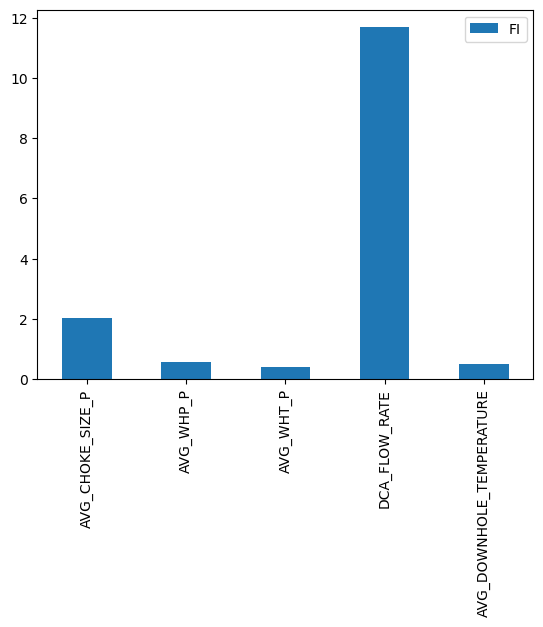

In [552]:
fi_df = pd.DataFrame(data = np.abs(sgd_reg_l1.coef_), index = features, columns = ["FI"])
fi_df.plot.bar()

### SGD Regressor with l2 regularization

In [559]:
from sklearn.linear_model import SGDRegressor
sgd_reg_l2 = SGDRegressor(penalty = "l2")
sgd_reg_l2.fit(X_train_dca, y_train)

SGDRegressor()

In [560]:
mean_squared_error(y_val, sgd_reg_l1.predict(X_val_dca))

1.0714132753246295

In [561]:
mean_squared_error(y_train, sgd_reg_l1.predict(X_train_dca))

8.390904483807098

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


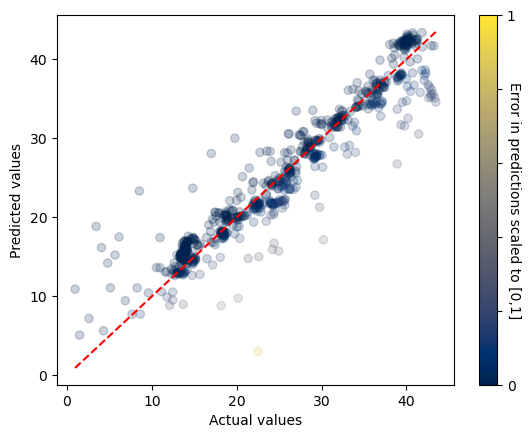

In [564]:
predict_plot(y_train, sgd_reg_l2.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


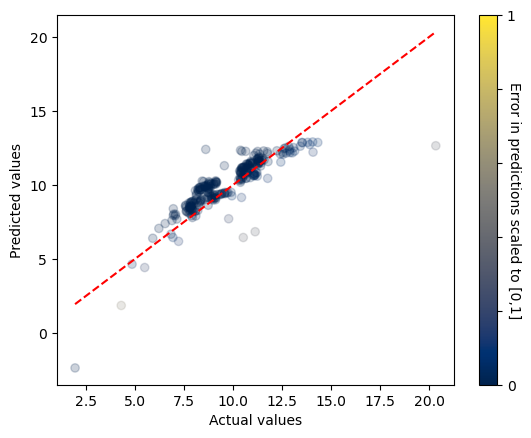

In [565]:
predict_plot(y_val, sgd_reg_l2.predict(X_val_dca))

<AxesSubplot: >

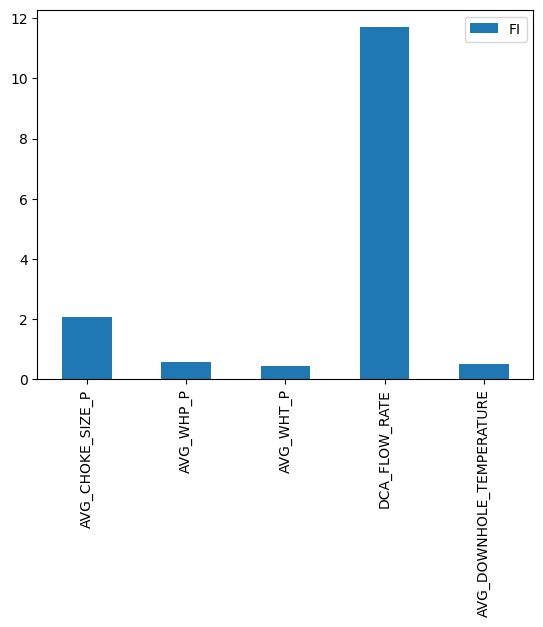

In [567]:
fi_df = pd.DataFrame(data = np.abs(sgd_reg_l2.coef_), index = features, columns = ["FI"])
fi_df.plot.bar()

***

## 2. Trying SVM

### 2.1 SVM RBF Kernel

In [568]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_dca, y_train)

SVR()

In [569]:
mean_squared_error(y_val, svr.predict(X_val_dca))

5.762330128944004

In [570]:
mean_squared_error(y_train, svr.predict(X_train_dca))

9.671417055886057

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


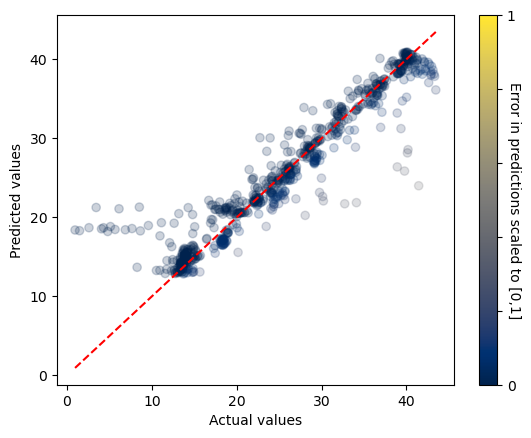

In [571]:
predict_plot(y_train, svr.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


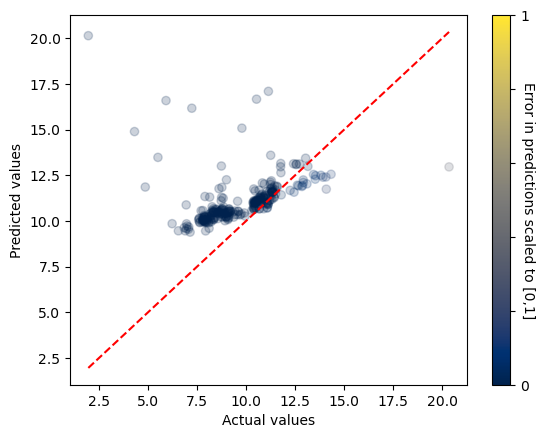

In [572]:
predict_plot(y_val, svr.predict(X_val_dca))

### 2.2 SVM Poly kernel

Degree = 3

In [584]:
from sklearn.svm import SVR
svm_poly_3 = SVR(kernel = "poly", degree = 3)
svm_poly_3.fit(X_train_dca, y_train)

SVR(kernel='poly')

In [585]:
mean_squared_error(y_val, svm_poly_3.predict(X_val_dca))

32.7920290135539

In [586]:
mean_squared_error(y_train, svm_poly_3.predict(X_train_dca))

17.37411230068175

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


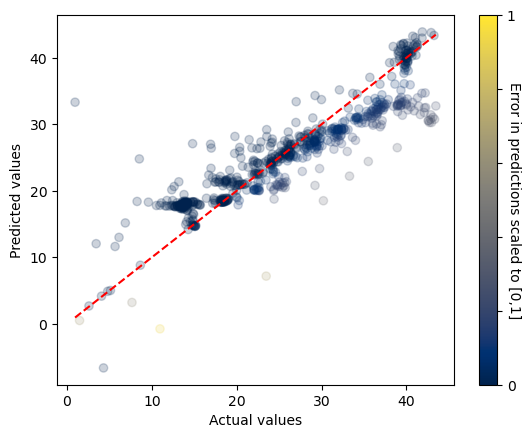

In [587]:
predict_plot(y_train, svm_poly_3.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


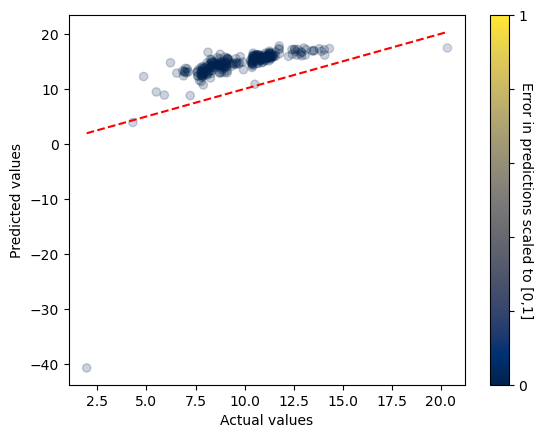

In [588]:
predict_plot(y_val, svm_poly_3.predict(X_val_dca))

***

## 3. Trying KNN Regressor

In [614]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=8)
knn_reg.fit(X_train_dca, y_train)

KNeighborsRegressor(n_neighbors=8)

In [615]:
mean_squared_error(y_val, knn_reg.predict(X_val_dca))

21.986692280399176

In [616]:
mean_squared_error(y_train, knn_reg.predict(X_train_dca))

7.4573078263124835

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


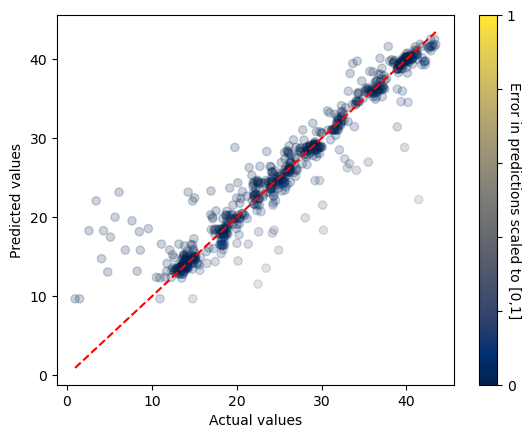

In [617]:
predict_plot(y_train, knn_reg.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


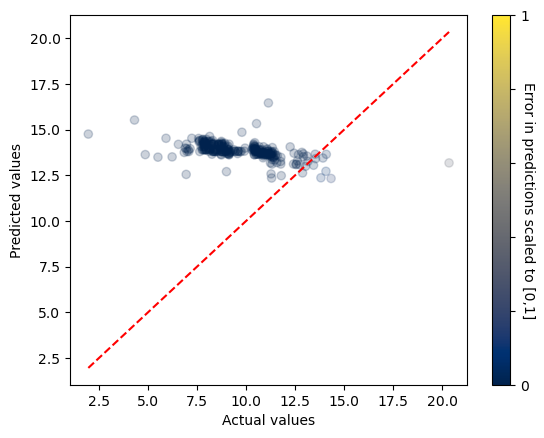

In [618]:
predict_plot(y_val, knn_reg.predict(X_val_dca))

***

## 4. Trying Random Forest Model

In [647]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train_dca, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [648]:
mean_squared_error(rf.predict(X_val_dca), y_val)

24.668444833164738

In [649]:
mean_squared_error(y_train, rf.predict(X_train_dca))

0.6342349895942495

Such a significant difference in the mean squared error between training predictions and validation predictions signifies that the Random Forest model is overfitting

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


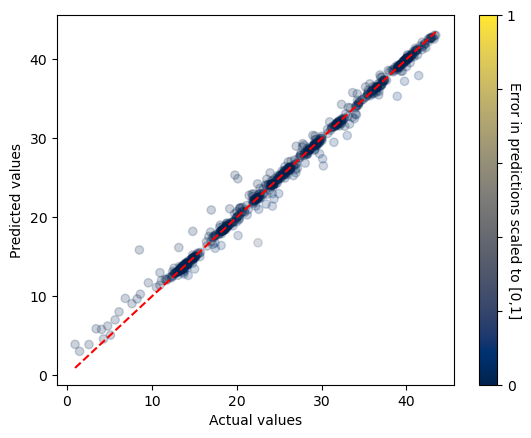

In [650]:
predict_plot(y_train, rf.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


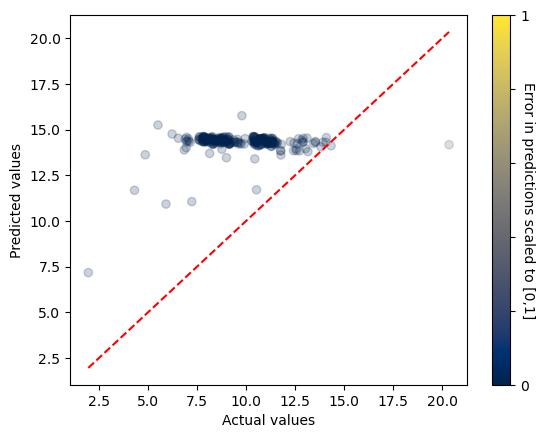

In [651]:
predict_plot(y_val, rf.predict(X_val_dca))

Feature importance in the Random Forest Model

<AxesSubplot: >

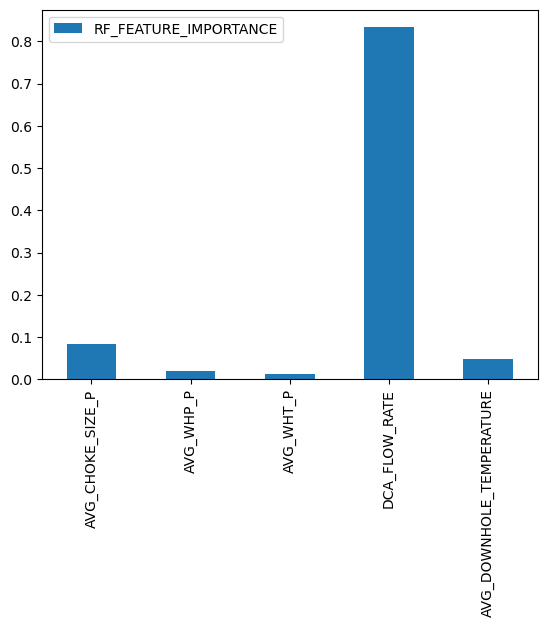

In [652]:
rf_fi = rf.feature_importances_
df_fi = pd.DataFrame(data = rf_fi, index = features_sub, columns=["RF_FEATURE_IMPORTANCE"])
df_fi.plot.bar()

***

## 5. Gradient Boosting

Using XGBRegressor

In [675]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_dca, y_train, eval_set = [(X_val_dca, y_val)], verbose = 2, early_stopping_rounds = 10)

[0]	validation_0-rmse:5.56736
[2]	validation_0-rmse:1.94133
[4]	validation_0-rmse:2.39299
[6]	validation_0-rmse:3.32930
[8]	validation_0-rmse:3.89053
[10]	validation_0-rmse:4.05330
[11]	validation_0-rmse:4.43890


C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\env\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [676]:
mean_squared_error(y_train, xgb_reg.predict(X_train_dca))

90.12054105609593

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


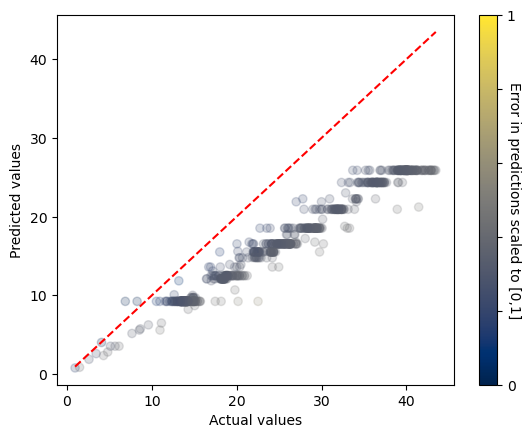

In [677]:
predict_plot(y_train, xgb_reg.predict(X_train_dca))

Using Gradient Boosting Regressor

In [711]:
from sklearn.ensemble import GradientBoostingRegressor
grd_reg = GradientBoostingRegressor(n_estimators = 150)
grd_reg.fit(X_train_dca, y_train)

GradientBoostingRegressor(n_estimators=150)

In [712]:
mean_squared_error(y_train, grd_reg.predict(X_train_dca))

0.5762447036739686

In [713]:
mean_squared_error(y_val, grd_reg.predict(X_val_dca))

32.78990667518505

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


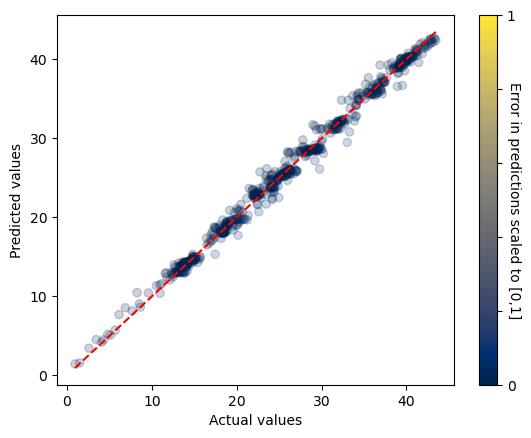

In [714]:
predict_plot(y_train, grd_reg.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


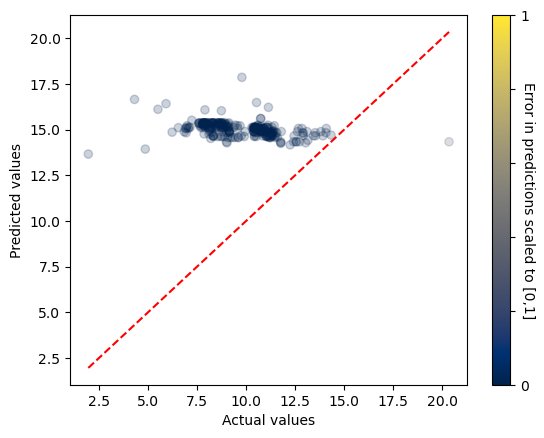

In [715]:
predict_plot(y_val, grd_reg.predict(X_val_dca))

***

## 6. Neural Networks

### 6.1 MLP Regressor using scikitlearn

In [716]:
## Trying MLP lyers from scikit-learn

from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor([100,10,1], max_iter = 10000, verbose = 2)
mlp_reg.fit(X_train_dca, y_train)

Iteration 1, loss = 357.14887668
Iteration 2, loss = 356.89563124
Iteration 3, loss = 356.43564840
Iteration 4, loss = 355.77830641
Iteration 5, loss = 354.95116232
Iteration 6, loss = 353.80870734
Iteration 7, loss = 352.34857987
Iteration 8, loss = 350.63275566
Iteration 9, loss = 348.62153019
Iteration 10, loss = 346.16613446
Iteration 11, loss = 343.30505007
Iteration 12, loss = 339.91557721
Iteration 13, loss = 336.15093784
Iteration 14, loss = 331.92163903
Iteration 15, loss = 327.26104914
Iteration 16, loss = 322.08827901
Iteration 17, loss = 316.28781959
Iteration 18, loss = 310.03325037
Iteration 19, loss = 303.00755623
Iteration 20, loss = 295.59094193
Iteration 21, loss = 287.29060694
Iteration 22, loss = 278.48468690
Iteration 23, loss = 268.89610820
Iteration 24, loss = 258.47515728
Iteration 25, loss = 247.60979561
Iteration 26, loss = 235.90722109
Iteration 27, loss = 223.60429064
Iteration 28, loss = 210.75261809
Iteration 29, loss = 197.30331123
Iteration 30, loss = 18

Iteration 263, loss = 2.77839959
Iteration 264, loss = 2.78064950
Iteration 265, loss = 2.77311893
Iteration 266, loss = 2.77015251
Iteration 267, loss = 2.76559652
Iteration 268, loss = 2.76292449
Iteration 269, loss = 2.76456620
Iteration 270, loss = 2.76169131
Iteration 271, loss = 2.75768417
Iteration 272, loss = 2.74225776
Iteration 273, loss = 2.74492633
Iteration 274, loss = 2.74440770
Iteration 275, loss = 2.73453323
Iteration 276, loss = 2.73463377
Iteration 277, loss = 2.72977351
Iteration 278, loss = 2.72672148
Iteration 279, loss = 2.72046121
Iteration 280, loss = 2.71618281
Iteration 281, loss = 2.71127699
Iteration 282, loss = 2.71295764
Iteration 283, loss = 2.71082293
Iteration 284, loss = 2.70333106
Iteration 285, loss = 2.69926267
Iteration 286, loss = 2.69814013
Iteration 287, loss = 2.69586070
Iteration 288, loss = 2.68744285
Iteration 289, loss = 2.69398648
Iteration 290, loss = 2.70600104
Iteration 291, loss = 2.69484579
Iteration 292, loss = 2.69374472
Iteration 

Iteration 523, loss = 2.10820753
Iteration 524, loss = 2.10714715
Iteration 525, loss = 2.10386144
Iteration 526, loss = 2.10353127
Iteration 527, loss = 2.10412141
Iteration 528, loss = 2.10018735
Iteration 529, loss = 2.09760113
Iteration 530, loss = 2.09647971
Iteration 531, loss = 2.09267580
Iteration 532, loss = 2.09345207
Iteration 533, loss = 2.09107466
Iteration 534, loss = 2.09090800
Iteration 535, loss = 2.08655988
Iteration 536, loss = 2.08609066
Iteration 537, loss = 2.08446639
Iteration 538, loss = 2.08551546
Iteration 539, loss = 2.08853109
Iteration 540, loss = 2.08161876
Iteration 541, loss = 2.07995189
Iteration 542, loss = 2.07990651
Iteration 543, loss = 2.08406599
Iteration 544, loss = 2.07911931
Iteration 545, loss = 2.07881947
Iteration 546, loss = 2.07266884
Iteration 547, loss = 2.07350409
Iteration 548, loss = 2.07163724
Iteration 549, loss = 2.07581871
Iteration 550, loss = 2.07201998
Iteration 551, loss = 2.06362292
Iteration 552, loss = 2.06896567
Iteration 

Iteration 800, loss = 1.82078100
Iteration 801, loss = 1.81747259
Iteration 802, loss = 1.81703577
Iteration 803, loss = 1.82394604
Iteration 804, loss = 1.81574031
Iteration 805, loss = 1.81704507
Iteration 806, loss = 1.81493992
Iteration 807, loss = 1.81732903
Iteration 808, loss = 1.81091029
Iteration 809, loss = 1.82053937
Iteration 810, loss = 1.81676837
Iteration 811, loss = 1.81438404
Iteration 812, loss = 1.81348839
Iteration 813, loss = 1.81254268
Iteration 814, loss = 1.81823080
Iteration 815, loss = 1.80810947
Iteration 816, loss = 1.81543886
Iteration 817, loss = 1.81285378
Iteration 818, loss = 1.80527225
Iteration 819, loss = 1.82531137
Iteration 820, loss = 1.81763277
Iteration 821, loss = 1.80430726
Iteration 822, loss = 1.80678014
Iteration 823, loss = 1.80748439
Iteration 824, loss = 1.80818492
Iteration 825, loss = 1.80280638
Iteration 826, loss = 1.80206475
Iteration 827, loss = 1.80283562
Iteration 828, loss = 1.80308969
Iteration 829, loss = 1.79935864
Iteration 

MLPRegressor(hidden_layer_sizes=[100, 10, 1], max_iter=10000, verbose=2)

In [717]:
mean_squared_error(y_val, mlp_reg.predict(X_val_dca))

1.793969393628268

In [718]:
mean_squared_error(y_train, mlp_reg.predict(X_train_dca))

3.4666149666287525

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


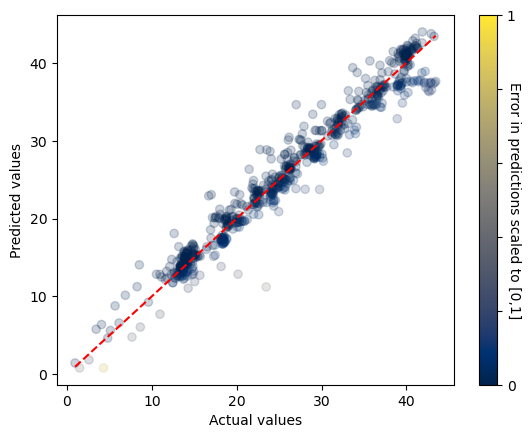

In [719]:
predict_plot(y_train, mlp_reg.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


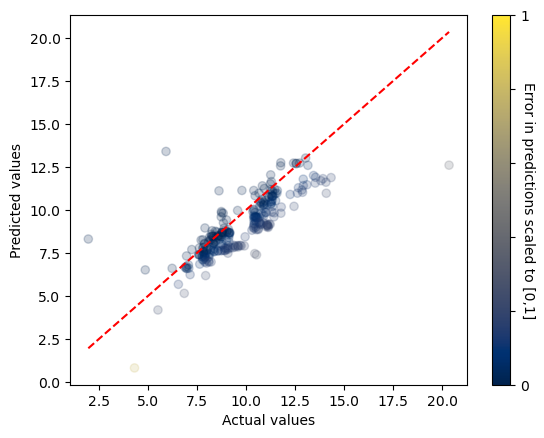

In [720]:
predict_plot(y_val, mlp_reg.predict(X_val_dca))

### 6.2 Tensorflow fully connected sequential neural network

In [755]:
nn = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[X_train_dca.shape[1]]),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "relu"),
    keras.layers.Dense(1, activation = "relu"),
])
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               600       
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________


In [756]:
nn.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.mean_squared_error)
early_stopping = keras.callbacks.EarlyStopping(monitor = "val_loss", restore_best_weights=True, patience=20)
history = nn.fit(X_train_dca, y_train, epochs = 1000, validation_data = (X_val_dca, y_val), callbacks=[early_stopping])

Epoch 1/1000
23/23 [==============================] - 1s 9ms/step - loss: 742.4986 - val_loss: 95.3635
Epoch 2/1000
23/23 [==============================] - 0s 4ms/step - loss: 714.6677 - val_loss: 83.8227
Epoch 3/1000
23/23 [==============================] - 0s 3ms/step - loss: 667.8708 - val_loss: 70.0534
Epoch 4/1000
23/23 [==============================] - 0s 4ms/step - loss: 597.7241 - val_loss: 52.3922
Epoch 5/1000
23/23 [==============================] - 0s 3ms/step - loss: 496.2844 - val_loss: 31.8619
Epoch 6/1000
23/23 [==============================] - 0s 4ms/step - loss: 365.1314 - val_loss: 14.5749
Epoch 7/1000
23/23 [==============================] - 0s 3ms/step - loss: 223.9669 - val_loss: 7.2316
Epoch 8/1000
23/23 [==============================] - 0s 4ms/step - loss: 112.0011 - val_loss: 12.7659
Epoch 9/1000
23/23 [==============================] - 0s 4ms/step - loss: 56.5418 - val_loss: 21.8590
Epoch 10/1000
23/23 [==============================] - 0s 4ms/step - loss: 

23/23 [==============================] - 0s 3ms/step - loss: 6.0537 - val_loss: 1.3121
Epoch 82/1000
23/23 [==============================] - 0s 3ms/step - loss: 5.9789 - val_loss: 1.2981
Epoch 83/1000
23/23 [==============================] - 0s 5ms/step - loss: 5.9220 - val_loss: 1.2586
Epoch 84/1000
23/23 [==============================] - 0s 5ms/step - loss: 5.9417 - val_loss: 1.2465
Epoch 85/1000
23/23 [==============================] - 0s 5ms/step - loss: 8.8227 - val_loss: 1.1452
Epoch 86/1000
23/23 [==============================] - 0s 4ms/step - loss: 6.6570 - val_loss: 1.2917
Epoch 87/1000
23/23 [==============================] - 0s 3ms/step - loss: 6.0891 - val_loss: 1.3870
Epoch 88/1000
23/23 [==============================] - 0s 4ms/step - loss: 5.9420 - val_loss: 1.3515
Epoch 89/1000
23/23 [==============================] - 0s 4ms/step - loss: 5.8669 - val_loss: 1.3555
Epoch 90/1000
23/23 [==============================] - 0s 3ms/step - loss: 5.9070 - val_loss: 1.3375
Epoc

In [757]:
mean_squared_error(y_val, nn.predict(X_val_dca))

9/9 [==============================] - 0s 2ms/step


1.1452238393645964

In [758]:
mean_squared_error(y_train, nn.predict(X_train_dca))

23/23 [==============================] - 0s 1ms/step


7.729889347788621

23/23 [==============================] - 0s 1ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


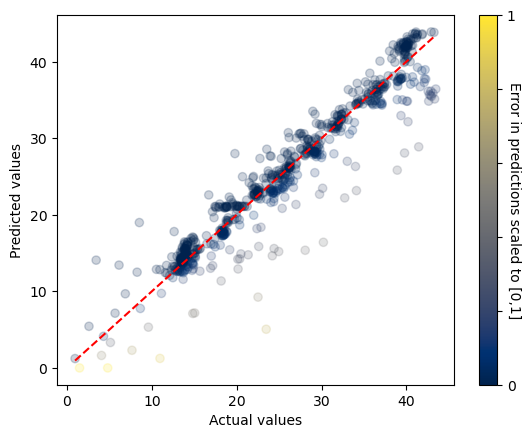

In [759]:
predict_plot(y_train, nn.predict(X_train_dca).ravel())

9/9 [==============================] - 0s 1ms/step


C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_8080\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


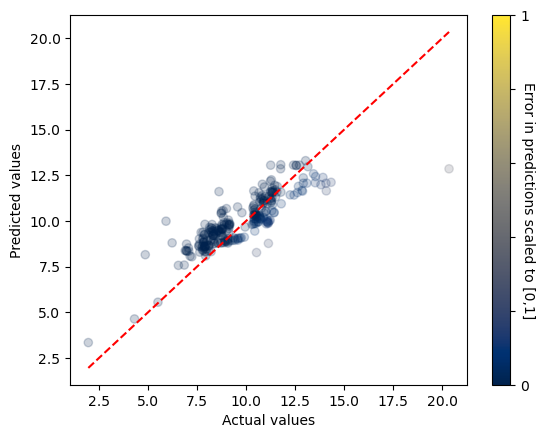

In [760]:
predict_plot(y_val, nn.predict(X_val_dca).ravel())

### 6.3 RNN's